In [19]:
# Import dependencies

import requests
import time
from datetime import datetime
import random
import numpy as np
import timeit
import pandas as pd
from config import weather_api_key
from citipy import citipy
import matplotlib.pyplot as plt

In [4]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)

858 µs ± 989 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
def longitudes(size):
    longitudes = []
    x = 0
    while x < (size):
        random_lng = random.randint(-90, 90) + random.random()
        longitudes.append(random_lng)
        x += 1
    return longitudes
# Call the function with 1500.
%timeit longitudes(1500)

849 µs ± 1.66 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

36.548671575854314 168.25128267832622
-32.85964759397311 161.09667667351027
-14.646918591680361 114.51886051873078
-74.64533896149585 108.49512608976778
24.022390260130777 -176.46601407318624
-25.74936206342504 -80.93473618358405
52.59933837210943 -176.62644593564832
53.9456581464062 -139.93661483430643
65.3328506721418 38.10753834040074
75.05418220143946 -98.98098359353685
-71.21098910770563 -124.85629840993853
33.30104268375703 -178.08958953786257
-29.394263889225314 -115.44255372940022
-80.74170982678146 105.53114808327808
28.31941344277874 -101.19172325886234
-73.98118192269155 49.682534470523535
56.853531603740436 -18.10106609680639
-55.58318111302065 81.70839988339753
89.00162562279937 -1.0436970533353644
39.91950334722924 91.06402622175648
44.878573316065314 -170.50856412809208
-12.025945655688332 -16.97338759021801
-16.875609963659087 119.22875471710591
88.65832767227698 -40.44873352335725
-69.19573717537045 154.49877146039154
-40.35951562902603 169.53147527726009
25.0288658004

In [8]:
cities = []
# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        cities.append(city)

In [10]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | port macquarie
Processing Record 3 of Set 1 | denpasar
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | taltal
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | onega
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | zaragoza
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | vestmannaeyjar
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 1 | hami
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | broome
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | bluff
Processing Re

Processing Record 36 of Set 4 | nikolskoye
Processing Record 37 of Set 4 | santa marta
Processing Record 38 of Set 4 | vanimo
Processing Record 39 of Set 4 | campos belos
Processing Record 40 of Set 4 | puerto escondido
Processing Record 41 of Set 4 | nadym
Processing Record 42 of Set 4 | anuradhapura
Processing Record 43 of Set 4 | gobabis
Processing Record 44 of Set 4 | santa ana
Processing Record 45 of Set 4 | codrington
Processing Record 46 of Set 4 | eyl
Processing Record 47 of Set 4 | mayya
Processing Record 48 of Set 4 | hunza
City not found. Skipping...
Processing Record 49 of Set 4 | hithadhoo
Processing Record 50 of Set 4 | pisco
Processing Record 1 of Set 5 | porto
Processing Record 2 of Set 5 | eagle pass
Processing Record 3 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 5 | bilibino
Processing Record 5 of Set 5 | monrovia
Processing Record 6 of Set 5 | danilov
Processing Record 7 of Set 5 | atka
City not found. Skipping...
Processing Record 

Processing Record 29 of Set 8 | kaka
Processing Record 30 of Set 8 | whitehorse
Processing Record 31 of Set 8 | pangkalanbuun
Processing Record 32 of Set 8 | gazojak
Processing Record 33 of Set 8 | namatanai
Processing Record 34 of Set 8 | bathsheba
Processing Record 35 of Set 8 | znamenskoye
Processing Record 36 of Set 8 | khandyga
Processing Record 37 of Set 8 | savannah bight
Processing Record 38 of Set 8 | usinsk
Processing Record 39 of Set 8 | samarinda
Processing Record 40 of Set 8 | jaque
Processing Record 41 of Set 8 | concordia
Processing Record 42 of Set 8 | waipawa
Processing Record 43 of Set 8 | cimahi
Processing Record 44 of Set 8 | hobyo
Processing Record 45 of Set 8 | solnechnyy
Processing Record 46 of Set 8 | vardo
Processing Record 47 of Set 8 | amderma
City not found. Skipping...
Processing Record 48 of Set 8 | aklavik
Processing Record 49 of Set 8 | sistranda
Processing Record 50 of Set 8 | nuuk
Processing Record 1 of Set 9 | padang
Processing Record 2 of Set 9 | nov

Processing Record 15 of Set 12 | fare
Processing Record 16 of Set 12 | pringsewu
Processing Record 17 of Set 12 | wanning
Processing Record 18 of Set 12 | charlestown
Processing Record 19 of Set 12 | krutikha
Processing Record 20 of Set 12 | baykit
Processing Record 21 of Set 12 | vila franca do campo
Processing Record 22 of Set 12 | high rock
Processing Record 23 of Set 12 | palu
Processing Record 24 of Set 12 | allahabad
Processing Record 25 of Set 12 | kaeo
Processing Record 26 of Set 12 | mocambique
City not found. Skipping...
Processing Record 27 of Set 12 | vigrestad
Processing Record 28 of Set 12 | banda aceh
Processing Record 29 of Set 12 | tondano
Processing Record 30 of Set 12 | kashi
Processing Record 31 of Set 12 | lebrija
Processing Record 32 of Set 12 | rosarito
Processing Record 33 of Set 12 | griffith
Processing Record 34 of Set 12 | colares
Processing Record 35 of Set 12 | finnsnes
Processing Record 36 of Set 12 | saint-augustin
Processing Record 37 of Set 12 | ierisso

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kurilsk,50.6789,156.1250,53.31,96,100,1.70,RU,2022-08-16 14:42:43
1,Port Macquarie,-31.4333,152.9167,45.90,70,53,7.63,AU,2022-08-16 14:42:43
2,Denpasar,-8.6500,115.2167,78.46,88,20,9.22,ID,2022-08-16 14:40:01
3,Albany,42.6001,-73.9662,77.31,56,91,5.08,US,2022-08-16 14:39:12
4,Kapaa,22.0752,-159.3190,73.38,100,75,8.05,US,2022-08-16 14:42:44
5,Taltal,-25.4000,-70.4833,67.26,50,1,6.87,CL,2022-08-16 14:42:44
6,Provideniya,64.3833,-173.3000,39.78,73,10,6.51,RU,2022-08-16 14:42:44
7,Sitka,57.0531,-135.3300,55.29,88,100,4.61,US,2022-08-16 14:42:45
8,Onega,63.9061,38.1404,74.57,59,100,5.41,RU,2022-08-16 14:42:45
9,Thompson,55.7435,-97.8558,68.16,77,20,6.91,CA,2022-08-16 14:40:22


In [13]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Kurilsk,RU,2022-08-16 14:42:43,50.6789,156.1250,53.31,96,100,1.70
1,Port Macquarie,AU,2022-08-16 14:42:43,-31.4333,152.9167,45.90,70,53,7.63
2,Denpasar,ID,2022-08-16 14:40:01,-8.6500,115.2167,78.46,88,20,9.22
3,Albany,US,2022-08-16 14:39:12,42.6001,-73.9662,77.31,56,91,5.08
4,Kapaa,US,2022-08-16 14:42:44,22.0752,-159.3190,73.38,100,75,8.05
5,Taltal,CL,2022-08-16 14:42:44,-25.4000,-70.4833,67.26,50,1,6.87
6,Provideniya,RU,2022-08-16 14:42:44,64.3833,-173.3000,39.78,73,10,6.51
7,Sitka,US,2022-08-16 14:42:45,57.0531,-135.3300,55.29,88,100,4.61
8,Onega,RU,2022-08-16 14:42:45,63.9061,38.1404,74.57,59,100,5.41
9,Thompson,CA,2022-08-16 14:40:22,55.7435,-97.8558,68.16,77,20,6.91


In [14]:
# Create the output file (CSV)

output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

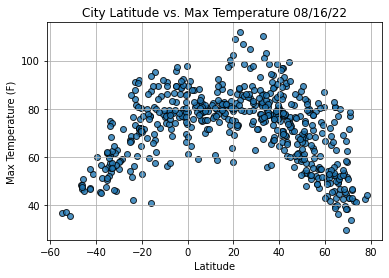

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

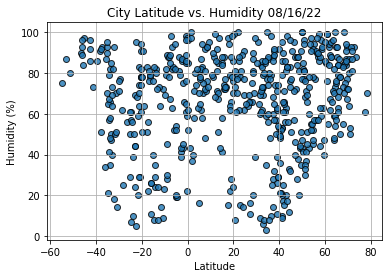

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

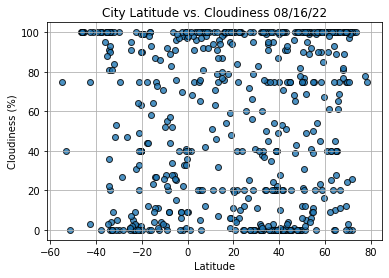

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

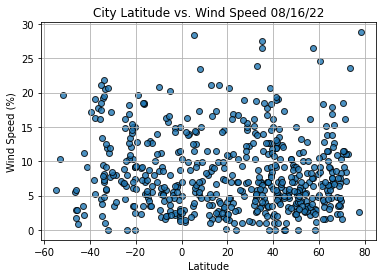

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()